In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Interpolation

We want to approximate the elements of a space of infinite dimension by using a finite dimensional subspace. Given $n + 1$ points $\{X_i\}^n_{i = 0}$ in the interval $[0, 1]$, the <b>Lagrange interpolation operator</b> is
$$L^n:C^0([0,1]) \rightarrow P^n$$
such that: $$(L^nf)(X_i) = f(X_i)$$
$C^0([0, 1])$ is the infinitely dimensiona space while $P^n$ is the finite dimensional space of polynomials of order n

### Interpolation: monomial basis

Such a space has dimension $n + 1$ and can be constructed using $n + 1$ linear combinations of linear independent polynomials of order $\le n$. A simple example can be represented by the monomials:
$$P^n = span\{v_i := x^i\}^n_{i=0}$$
Given a basis $v_i$^n_{i = 0}, any element of $P^n$ can be written as a linear combination of the basis
$$\forall p \in P^n, \exists! \{p^i\}^n_{i = 0} \:\: | \:\: p(x) = \sum^n_{i = 0}{p^iv_i(x)}$$
If we want to solve the interpolation problem above, then we need to find the coefficients $p^i$ of the polynomial $p$ that interpolates at the points $X_i$
$$v_j(X_i)p^j = f(X_i) \Leftrightarrow [[V]][p] = [F]$$

In [142]:
def my_function(x):
	return 1/(1+100*(x-0.5)**2)#abs(x - 0.5)

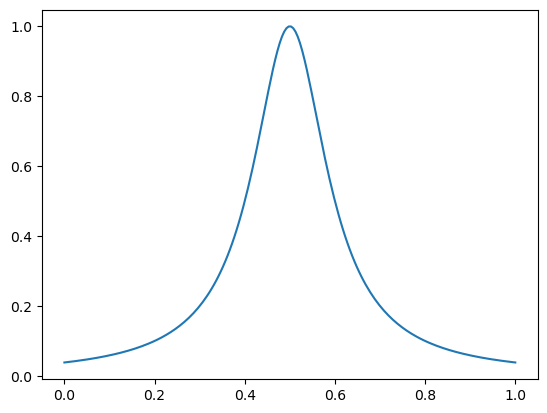

In [143]:
x = linspace(0, 1, 200)
plot(x, my_function(x))

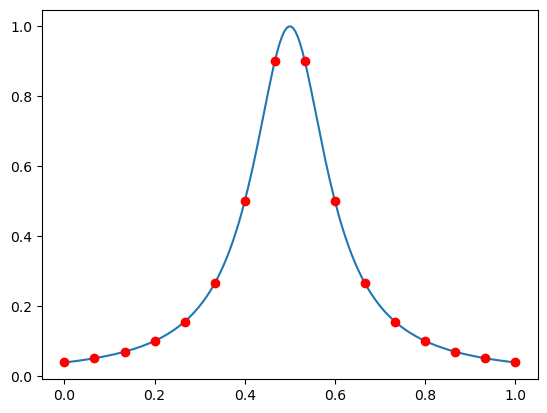

In [144]:
n = 15 # Degree of the polynomial

X = linspace(0, 1, n + 1)

plot(x, my_function(x))
plot(X, my_function(X), 'ro')

In [145]:
# Build th basis

def basis(x, i, n): # v_i(x)
	"""
	Build the monomial basis
	n is the order of the polynomial
	i is a number between 0 and n
	"""
	return x**i

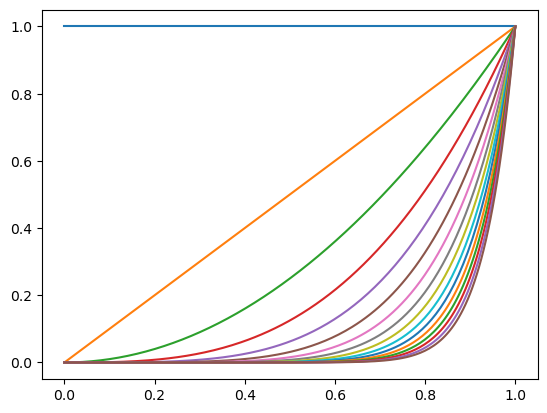

In [146]:
# Visualize the basis
for i in range(n + 1):
	plot(x, basis(x, i, n))

In [147]:
# Build V which is the vandermonde matrix
V = np.zeros((n + 1, n + 1))

V = array([[basis(X[i], j, n) for j in range(n + 1)] for i in range(n + 1)])

V

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 6.66666667e-02, 4.44444444e-03, 2.96296296e-04,
        1.97530864e-05, 1.31687243e-06, 8.77914952e-08, 5.85276635e-09,
        3.90184423e-10, 2.60122949e-11, 1.73415299e-12, 1.15610199e-13,
        7.70734663e-15, 5.13823109e-16, 3.42548739e-17, 2.28365826e-18],
       [1.00000000e+00, 1.33333333e-01, 1.77777778e-02, 2.37037037e-03,
        3.16049383e-04, 4.21399177e-05, 5.61865569e-06, 7.49154092e-07,
        9.98872123e-08, 1.33182950e-08, 1.77577266e-09, 2.36769688e-10,
        3.15692918e-11, 4.20923891e-12, 5.61231854e-13, 7.48309139e-14],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04, 6.40000000e-05, 1.280

In [148]:
u = my_function(X)

In [149]:
p = solve(V, u)

In [150]:
B = array([[basis(x[i], j, n) for j in range(n + 1)] for i in range(len(x))])
B.shape

(200, 16)

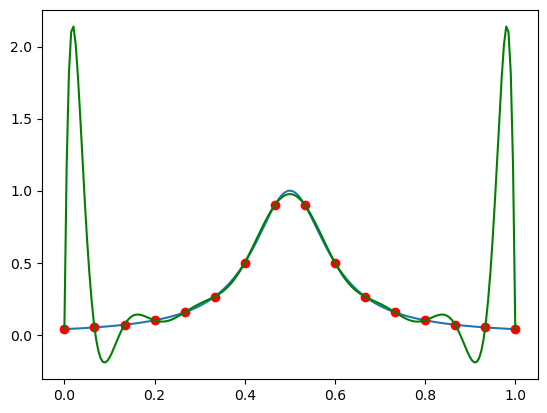

In [151]:
plot(x, my_function(x))
plot(X, V.dot(p), 'ro')
plot(x, B.dot(p), 'g')

In [152]:
# Compute the error
error = np.max(abs(B.dot(p) - my_function(x)))
error

2.0979201975531256

In [153]:
cond(V) # should be 1 to obtain good results (vandermonde matrix is bad conditioned)

3121644400565.5938

In [159]:
def interpolation(func, X, x):
	n = len(X) - 1
	V = array([[basis(X[i], j, n) for j in range(n + 1)] for i in range(n + 1)])
	print(f"Condition number of V: {cond(V)}")
	B = array([[basis(x[i], j, n) for j in range(n + 1)] for i in range(len(x))])
	p = solve(V, func(X))
	return B.dot(p), p, B, V

Condition number of V: 3121644400565.5938


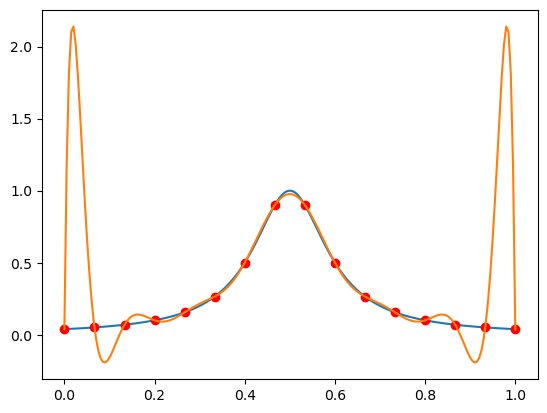

In [160]:
plot(x, my_function(x))
plot(X, my_function(X), 'ro')
plot(x, interpolation(my_function, X, x)[0])

Condition number of V: 98.86773850722761
Condition number of V: 686.4349418185991
Condition number of V: 4924.371056611108
Condition number of V: 36061.16088021076
Condition number of V: 267816.7009078502
Condition number of V: 2009396.3800224673
Condition number of V: 15193229.677187249
Condition number of V: 115575244.51579584
Condition number of V: 883478685.8850404
Condition number of V: 6780588383.3665285
Condition number of V: 52214923151.669525
Condition number of V: 403235043866.9944
Condition number of V: 3121644400565.5938
Condition number of V: 24218835543232.004
Condition number of V: 188306134746742.94
Condition number of V: 1466925536286667.2
Condition number of V: 1.1565542381706504e+16
Condition number of V: 8.94943791081694e+16
Condition number of V: 7.599857782431071e+17
Condition number of V: 2.9528459467429384e+19
Condition number of V: 3.2188616632242893e+18
Condition number of V: 3.711543652754458e+18
Condition number of V: 3.8921229375726084e+19
Condition number 

Text(0, 0.5, 'Error')

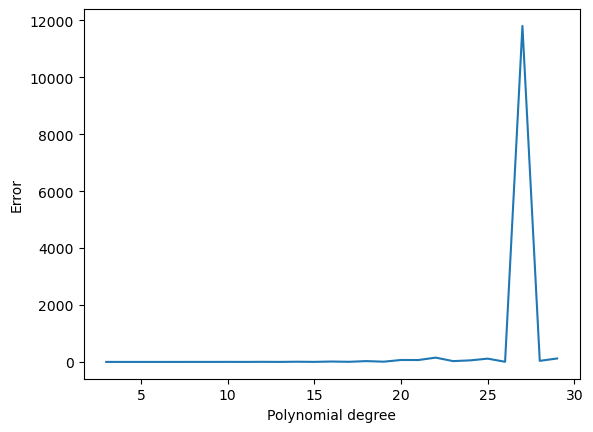

In [164]:
error = []
N = range(3, 30)
for n in N:
	X = linspace(0, 1, n + 1)
	error.append(np.max(abs(interpolation(my_function, X, x)[0] - my_function(x))))

plot(N, error)
xlabel('Polynomial degree')
ylabel('Error')